In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import uproot

import torch
import torch_geometric


In [2]:
root_file_path='/sps/t2k/lperisse/Soft/wcsim/results/electron/wcsim112_UnifVtx_electron_HK_10MeV_WINDOWS.root'
root_file = uproot.open(root_file_path)

print(root_file['THits'].keys())

hitc = root_file['THits']['hitc'].arrays()
hitc = [item['hitc'] for item in hitc]

hitt = root_file['THits']['hitt'].arrays()
hitt = [item['hitt'] for item in hitt]

hitx = root_file['THits']['hitx'].arrays()
hitx = [item['hitx'] for item in hitx]
hity = root_file['THits']['hity'].arrays()
hity = [item['hity'] for item in hity]
hitz = root_file['THits']['hitz'].arrays()
hitz = [item['hitz'] for item in hitz]

hittype = root_file['THits']['hitsType'].arrays()
hittype = [item['hitsType'] for item in hittype]

eventNumber = root_file['THits']['eventNumber'].arrays()
eventNumber = [item['eventNumber'] for item in eventNumber]

['eventType', 'vertex_x', 'vertex_y', 'vertex_z', 'vertex_t', 'direction_x', 'direction_y', 'direction_z', 'energy', 'n_hits', 'eventNumber', 'hitsType', 'hitx', 'hity', 'hitz', 'hitDirx', 'hitDiry', 'hitDirz', 'hitt', 'hitc', 'tubeIds']


## Charge

In [21]:
total_c=np.array([])
for event in range(len(hitc)):
    event_total_c=sum(np.array(hitc[event]))
    total_c = np.append(total_c, event_total_c)

In [5]:
max_c=np.array([])
for event in range(len(hitc)):
    event_max=max(np.array(hitc[event]))
    max_c = np.append(max_c, event_max)
print(max(max_c))

399.9374084472656


In [24]:
print(f'Maximum charge : {max(total_c)}')
print(f'Minimum charge : {min(total_c)}')

Maximum charge : 427.5325168967247
Minimum charge : 0.5288050174713135


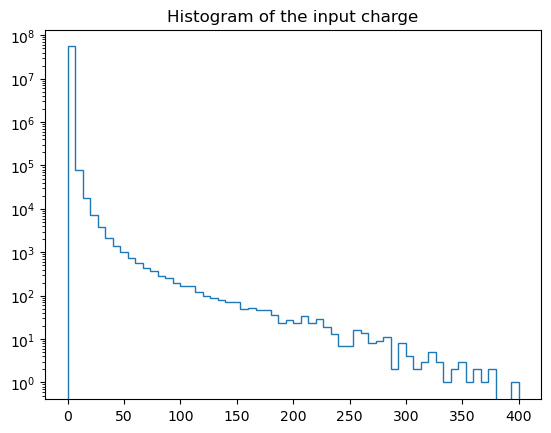

In [6]:
plt.hist(np.concatenate(hitc), bins=60, histtype='step')
plt.title('Histogram of the input charge')
plt.yscale('log')
plt.show()

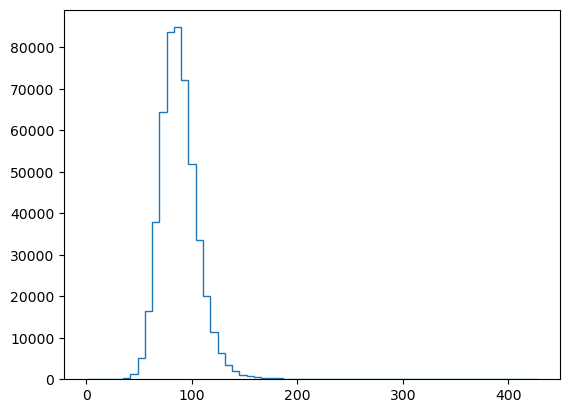

In [25]:
plt.hist(total_c, bins=62, histtype='step')
plt.show()

In [5]:
# Initialize lists to store the calculated values for each event
ave_c_event = []
total_c_event = []
max_c_event = []
std_c_event = []

# Iterate through each event
for event_charge in hitc:
    # Calculate the total charge per event by summing up all hit charges
    total_charge_per_event = np.sum(event_charge)
    
    # Calculate the average charge per event by dividing the total charge by the number of hits
    average_charge = total_charge_per_event / len(event_charge)
    
    # Calculate the maximum charge per event
    max_charge_per_event = np.max(event_charge)
    
    # Calculate the standard deviation of charge per event
    std_charge_per_event = np.std(event_charge)
    
    # Append the calculated values to their respective lists
    ave_c_event.append(average_charge)
    total_c_event.append(total_charge_per_event)
    max_c_event.append(max_charge_per_event)
    std_c_event.append(std_charge_per_event)

# Convert the lists to numpy arrays for further analysis if needed
ave_c_event = np.array(ave_c_event)
total_c_event = np.array(total_c_event)
max_c_event = np.array(max_c_event)
std_c_event = np.array(std_c_event)

# Print the first few values to verify the calculations
print("Average charge per event:", ave_c_event[:5])
print("Total charge per event:", total_c_event[:5])
print("Maximum charge per event:", max_c_event[:5])
print("Standard deviation of charge per event:", std_c_event[:5])

KeyboardInterrupt: 

## Time

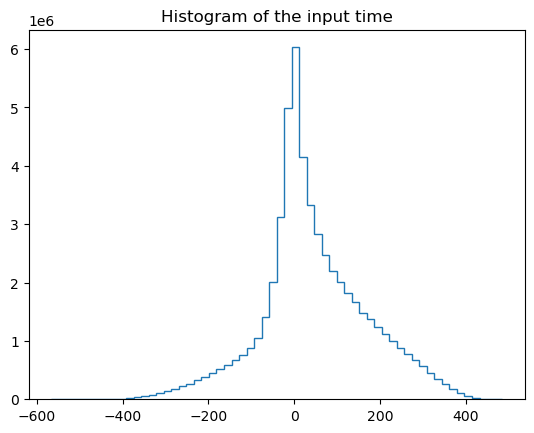

In [9]:
plt.hist(np.concatenate(hitt), bins=60, histtype='step')
plt.title('Histogram of the input time')
# plt.yscale('log')
plt.show()

In [3]:
hitt_sig = [data[mask == 1] for data, mask in zip(hitt, hittype)]
hitt_noise = [data[mask == 0] for data, mask in zip(hitt, hittype)]

In [4]:
tdiff_sig = []
tdiff_noise = []
tdiff_sig_2nd = []
tdiff_noise_2nd = []
for data_sig, data_noise in zip(hitt_sig, hitt_noise):

    sort_signal = np.sort(data_sig)
    sort_noise = np.sort(data_noise)

    # Compute differences with the second closest neighbor
    sig_differences = np.diff(sort_signal)
    noise_differences = np.diff(sort_noise)

    tdiff_sig.append(sig_differences)
    tdiff_noise.append(noise_differences)

    # Compute differences with the second closest neighbor
    sig_differences_2nd = sort_signal[2:] - sort_signal[:-2]
    noise_differences_2nd = sort_noise[2:] - sort_noise[:-2]

    tdiff_sig_2nd.append(sig_differences_2nd)
    tdiff_noise_2nd.append(noise_differences_2nd)

tdiff_sig = np.concatenate(tdiff_sig)
tdiff_noise = np.concatenate(tdiff_noise)
tdiff_sig_2nd = np.concatenate(tdiff_sig_2nd)
tdiff_noise_2nd = np.concatenate(tdiff_noise_2nd)

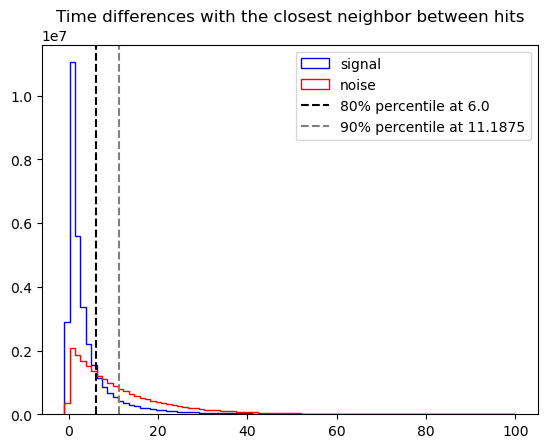

In [10]:
bin_edges = np.linspace(-1, 100, 85)

plt.hist(tdiff_sig, bins=bin_edges, histtype='step', label='signal', color='b')
plt.hist(tdiff_noise, bins=bin_edges, histtype='step', label='noise', color='r')

radius = np.quantile(tdiff_sig, 0.8, axis=0)
plt.axvline(x=radius, color='black', linestyle='--', linewidth=1.5, label=f'80% percentile at {radius}')
radius2 = np.quantile(tdiff_sig, 0.9, axis=0)
plt.axvline(x=radius2, color='grey', linestyle='--', linewidth=1.5, label=f'90% percentile at {radius2}')

plt.legend()
plt.title('Time differences with the closest neighbor between hits')
# plt.yscale('log')
plt.show()

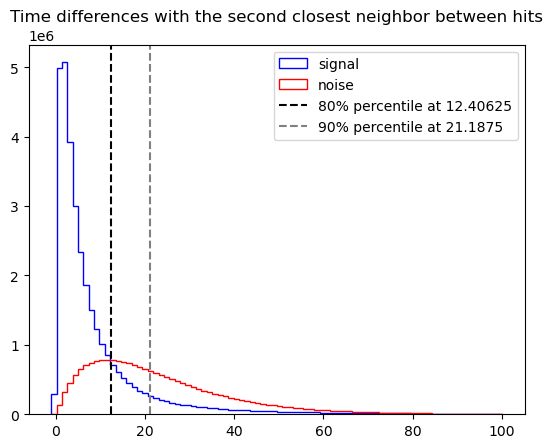

In [11]:
bin_edges = np.linspace(-1, 100, 85)

plt.hist(tdiff_sig_2nd, bins=bin_edges, histtype='step', label='signal', color='b')
plt.hist(tdiff_noise_2nd, bins=bin_edges, histtype='step', label='noise', color='r')

radius = np.quantile(tdiff_sig_2nd, 0.8, axis=0)
plt.axvline(x=radius, color='black', linestyle='--', linewidth=1.5, label=f'80% percentile at {radius}')
radius2 = np.quantile(tdiff_sig_2nd, 0.9, axis=0)
plt.axvline(x=radius2, color='grey', linestyle='--', linewidth=1.5, label=f'90% percentile at {radius2}')

plt.legend()
plt.title('Time differences with the second closest neighbor between hits')
# plt.yscale('log')
plt.show()

## Distance PMT

In [2]:
root_file_path='/sps/t2k/lperisse/Soft/wcsim/results/electron/wcsim112_UnifVtx_electron_HK_10MeV_WINDOWS.root'
root_file = uproot.open(root_file_path)

print(root_file['THits'].keys())
tubeIds = root_file['THits']['tubeIds'].arrays()
# hitt = [item['hitt'] for item in hitt]

['eventType', 'vertex_x', 'vertex_y', 'vertex_z', 'vertex_t', 'direction_x', 'direction_y', 'direction_z', 'energy', 'n_hits', 'eventNumber', 'hitsType', 'hitx', 'hity', 'hitz', 'hitDirx', 'hitDiry', 'hitDirz', 'hitt', 'hitc', 'tubeIds']


In [3]:
tubeIds

<Array [{tubeIds: [7979, ...]}, ..., {...}] type='493978 * {tubeIds: var * ...'>

## Position 

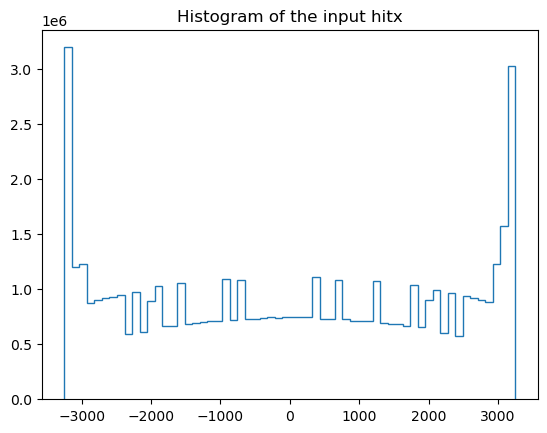

In [9]:
plt.hist(np.concatenate(hitx), bins=60, histtype='step')
plt.title('Histogram of the input hitx')
# plt.yscale('log')
plt.show()

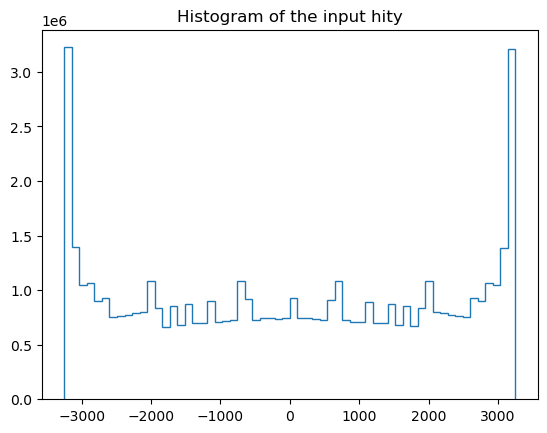

In [5]:
plt.hist(np.concatenate(hity), bins=60, histtype='step')
plt.title('Histogram of the input hity')
# plt.yscale('log')
plt.show()

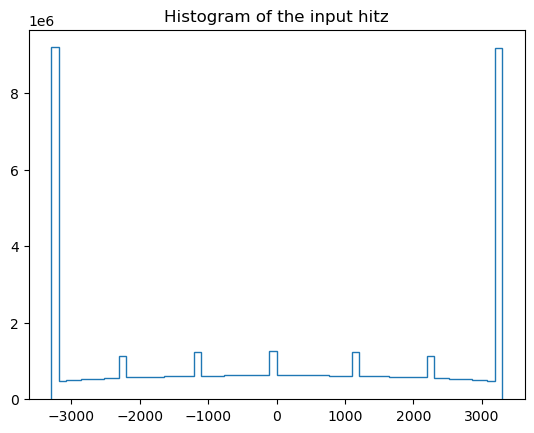

In [6]:
plt.hist(np.concatenate(hitz), bins=60, histtype='step')
plt.title('Histogram of the input hitz')
# plt.yscale('log')
plt.show()